In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/OmkarPathak/Playing-with-datasets/master/Email%20Spam%20Filtering/emails.csv")

In [3]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df.shape

(5728, 2)

In [5]:
df["spam"].unique()

array([1, 0])

In [6]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [7]:
df["text"] = df["text"].str.replace("Subject: ", "")

In [8]:
df.head()

,text,spam
0,naturally irresistible your corporate identity...,1
1,the stock trading gunslinger fanny is merrill...,1
2,unbelievable new homes made easy im wanting t...,1
3,4 color printing special request additional i...,1
4,"do not have money , get software cds from here...",1


In [9]:
df["text"][0]

"naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing b

In [10]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Assuming df is your DataFrame
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs and links
    text = ' '.join([word for word in text.split() if not any(link in word for link in ['http', 'www'])])

    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuation])

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

# Apply the preprocessing function to the "text" column
df["preprocessed_text"] = df["text"].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
df.head()

,text,spam,preprocessed_text
0,naturally irresistible your corporate identity...,1,naturally irresistible corporate identity lt r...
1,the stock trading gunslinger fanny is merrill...,1,stock trading gunslinger fanny merrill muzo co...
2,unbelievable new homes made easy im wanting t...,1,unbelievable new homes made easy im wanting sh...
3,4 color printing special request additional i...,1,4 color printing special request additional in...
4,"do not have money , get software cds from here...",1,money get software cds software compatibility ...


In [12]:
del df["text"]

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
tokenize = Tokenizer()

In [15]:
tokenize.fit_on_texts(df["preprocessed_text"])

In [16]:
num = max(tokenize.word_index.values())+1
num

37208

In [17]:
seq = tokenize.texts_to_sequences(df["preprocessed_text"])

In [18]:
seq = pad_sequences(seq , maxlen = 200 , padding = "post")

In [19]:
seq

array([[ 5682, 12152,   410, ...,     0,     0,     0],
       [  397,   119, 22199, ...,     0,     0,     0],
       [ 9057,    26,  4788, ...,     0,     0,     0],
       ...,
       [   96,   530,   102, ...,  1701,   203,   349],
       [  194,   280,     6, ...,     0,     0,     0],
       [ 2893,  4910,    58, ...,    42,    16,   193]], dtype=int32)

In [20]:
seq[0]

array([ 5682, 12152,   410,  1656,  3778,   347,   789,  4283,    50,
          58,   296,  6173,    25,  9056,    96,  4394,   721,  5926,
        5927,  1555,   198,    62,  2037,   145,  1726,  1869,  7892,
        1583,  4177,    50, 10876,   567,   303,  5683,  6438,  7893,
         377,    96,   251,   756,    32,   737,  4395,  2925,  4520,
        4284,    58,  1869,   344,   662,   567,   145,   756,    99,
         900,  1163,  4396,   983,   213,   186,  2379,  3414,   447,
        1907,  4178,    50,  1136,  1015,   721,  1318,   586,  2441,
         718,    92,   573,    57,   164,  4521,   340,   198,   573,
         335,   844,  4397,    63,   721,  4064,   173,   394,    32,
         192,  4398,   344,  1262,    62,  3618,  1232,   376,  1996,
        1164,   166,  1850,   617,   326,  1361,  1927,  4522,  1180,
         800,  2272,    83,   578,   135,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [21]:
from keras.layers import SimpleRNN , Dense , Embedding , LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split

# Simple RNN

In [26]:
model = Sequential()

model.add(Embedding(input_dim = num, output_dim = 100,input_length = 200))
model.add(SimpleRNN(100 , return_sequences = False))
model.add(Dense(1 , activation = "sigmoid"))

model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
X_train , X_test , y_train , y_test = train_test_split(seq , df["spam"] , test_size = 0.2)
history = model.fit(X_train , y_train , epochs = 10 , validation_split = 0.2)

Epoch 1/10
115/115 [==============================] - 45s 374ms/step - loss: 0.5422 - accuracy: 0.7593 - val_loss: 0.6061 - val_accuracy: 0.7546
Epoch 2/10
115/115 [==============================] - 38s 330ms/step - loss: 0.4986 - accuracy: 0.7754 - val_loss: 0.5036 - val_accuracy: 0.7743
Epoch 3/10
115/115 [==============================] - 39s 342ms/step - loss: 0.4624 - accuracy: 0.7913 - val_loss: 0.5001 - val_accuracy: 0.7786
Epoch 4/10
115/115 [==============================] - 41s 355ms/step - loss: 0.4549 - accuracy: 0.7935 - val_loss: 0.5041 - val_accuracy: 0.7644
Epoch 5/10
115/115 [==============================] - 47s 410ms/step - loss: 0.4517 - accuracy: 0.7943 - val_loss: 0.5022 - val_accuracy: 0.7699
Epoch 6/10
115/115 [==============================] - 29s 255ms/step - loss: 0.4461 - accuracy: 0.7959 - val_loss: 0.5010 - val_accuracy: 0.7732
Epoch 7/10
115/115 [==============================] - 34s 296ms/step - loss: 0.4511 - accuracy: 0.7943 - val_loss: 0.5088 - val_ac

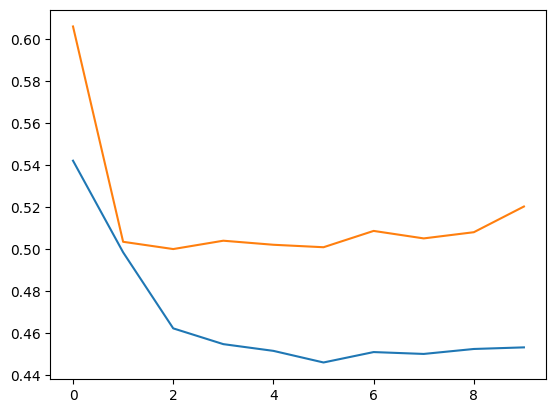

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

# LSTM

In [24]:
model = Sequential()

model.add(Embedding(input_dim = num, output_dim = 100,input_length = 200))
model.add(LSTM(100 , return_sequences =False))
model.add(Dense(1 , activation = "sigmoid"))

model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
X_train , X_test , y_train , y_test = train_test_split(seq , df["spam"] , test_size = 0.2)
history = model.fit(X_train , y_train , epochs = 10 , validation_split = 0.2)

Epoch 1/10
115/115 [==============================] - 33s 219ms/step - loss: 0.5571 - accuracy: 0.7596 - val_loss: 0.5327 - val_accuracy: 0.7764
Epoch 2/10
115/115 [==============================] - 20s 175ms/step - loss: 0.6563 - accuracy: 0.7383 - val_loss: 0.5270 - val_accuracy: 0.7601
Epoch 3/10
115/115 [==============================] - 20s 175ms/step - loss: 0.4939 - accuracy: 0.7735 - val_loss: 0.4831 - val_accuracy: 0.7743
Epoch 4/10
115/115 [==============================] - 15s 134ms/step - loss: 0.4628 - accuracy: 0.7907 - val_loss: 0.4692 - val_accuracy: 0.7775
Epoch 5/10
115/115 [==============================] - 15s 133ms/step - loss: 0.3729 - accuracy: 0.8434 - val_loss: 0.2129 - val_accuracy: 0.9455
Epoch 6/10
115/115 [==============================] - 20s 163ms/step - loss: 0.1695 - accuracy: 0.9572 - val_loss: 0.1710 - val_accuracy: 0.9564
Epoch 7/10
115/115 [==============================] - 14s 115ms/step - loss: 0.1686 - accuracy: 0.9566 - val_loss: 0.1555 - val_ac

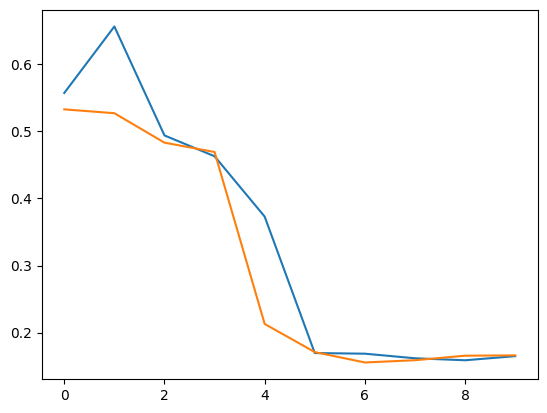

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])